<a href="https://colab.research.google.com/github/JD-man/DeepLearning_Study/blob/main/Chapter3/Chapter3_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
// 코랩업로드로 csv파일이 안올라가 구글드라이브 연동함
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# 내 드라이브의 경로
cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
# 판다스 임포트 후 csv파일 읽음 
# 원본은 5500만 로우나 있어 50만 로우만 읽음
# parse_dates에 날짜 형식 칼럼을 지정하면 날짜와 시간 연산을 편하게 사용할 수 있다.
import pandas as pd

df = pd.read_csv('NYC_taxi.csv', parse_dates=['pickup_datetime'], nrows=500000)

In [ ]:
# 처음 5줄 조회
# 첫칼럼인 key는 pickup_datetime과 칼럼과 값이 동일하며 고유ID가 사용됨. 이 칼럼은 삭제되어도 괜찮다.
print(df.head())

                             key  ...  passenger_count
0    2009-06-15 17:26:21.0000001  ...                1
1    2010-01-05 16:52:16.0000002  ...                1
2   2011-08-18 00:35:00.00000049  ...                2
3    2012-04-21 04:30:42.0000001  ...                1
4  2010-03-09 07:51:00.000000135  ...                1

[5 rows x 8 columns]


In [ ]:
# 위치 데이터 시각화
# 요금 예측에서 가장 중요한 정보는 승차 위치와 하차 위치이다. 택시 요금은 운행 거리로 결정하기 때문.
# 위도는 지구의 row, 경도는 지구의 column 같은거다.

# 지구를 점차트라고 생각하면 위도와 경도는 점차트의 축이되고, 점차트의 각 점이 지구상의 특정 위치이다.
# 데이터셋에 있는 승차위치와 하차위치의 위도와 경도로 점차트를 그릴 수 있다.

# 뉴욕시의 경도 범위
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

# 뉴욕시의 위도 범위
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

# 원본데이터에서 뉴욕시 내의 승하차위치를 df2에 복사한다.
df2 = df.copy(deep=True)
for long in ['pickup_longitude', 'dropoff_longitude']:
  df2 = df2[(df2[long] > nyc_min_longitude) & (df2[long] < nyc_max_longitude)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
  df2 = df2[(df2[lat] > nyc_min_latitude) & (df2[lat] < nyc_max_latitude)]


In [ ]:
# DataFrame에 있는 승차 위치를 점차트로 그리는 함수를 정의하기.
# 뉴욕시의 랜드마크도 같이 그린다.

import matplotlib.pyplot as plt

def plot_lat_long(df, landmarks, points='Pickup'):
  # 차트크기설정
  plt.figure(figsize = (12,12))

  # DataFrame의 승하차위치의 위도경도를 점차트로 그리기
  if points == 'Pickup':
    plt.plot(list(df.pickup_longitude), list(df.pickup_latitude), '.', markersize=1)
  else:
    plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude), '.', markersize=1)
  
  # 랜드마크표시
  for landmark in landmarks:
    plt.plot(landmarks[landmark][0], landmarks[landmark][1], '*', markersize=15, alpha=1, color='r')

    plt.annotate(landmark, (landmarks[landmark][0]+0.005, landmarks[landmark][1]+0.005), color='r', backgroundcolor='w')

  plt.title("{}Locations in NYC Illustrated".format(points))
  plt.grid(None)
  plt.xlabel("Latitude")
  plt.ylabel("Longitude")
  plt.show()

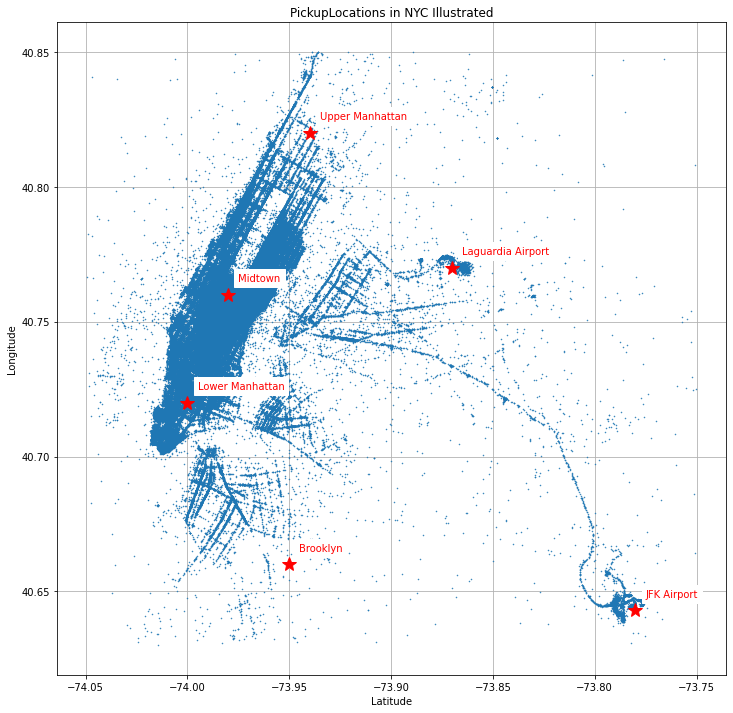

In [ ]:
landmarks = {"JFK Airport": (-73.78, 40.643),
             "Laguardia Airport": (-73.87, 40.77),
             "Midtown": (-73.98, 40.76),
             "Lower Manhattan": (-74.00, 40.72),
             "Upper Manhattan": (-73.94, 40.82),
             "Brooklyn": (-73.95, 40.66)}

# 승차위치 그리기
plot_lat_long(df2, landmarks, points='Pickup')

In [ ]:
# 점차트로 승차위치만 그렸을 뿐인데 뉴욕시 전체와 유명한 도로를 한눈에 볼수있다
# 맨하탄에는 Midtown에서 많이 승차. 다음으로 Lower Manhattan에서 많이 승차. 사무실과 관광지가 많아서
# Upper Manhattan에서는 탑승횟수가 적다. 대체로 거주 지역이라서
# 맨하탄 밖에서 승차는 많이 안하는데 공항에서의 승차는 많다.

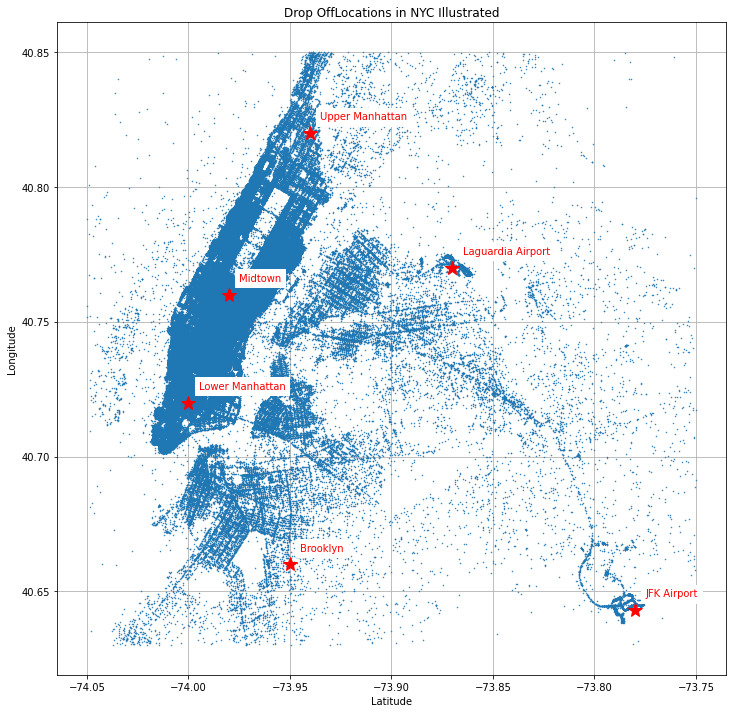

In [ ]:
# 하차위치 그리기
plot_lat_long(df2, landmarks, points='Drop Off')

In [ ]:
# 승차위치와 비교하면 브루클린과 Upper Manhattan같은 거주지역에 하차가 더 많다

In [ ]:
# 요일 및 시간별 승차 통계

# pickup_datetime 칼럼에 승차일자 시간정보가 있다.
# 이 칼럼을 연, 월, 일, 요일, 시각 요소로 나눠 다른 칼럼에 저장한다
# 판다스로 가져올때 parse_dates에 pickup_datetime을 사용해 시각요소를 분리할 수 있다.


df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour


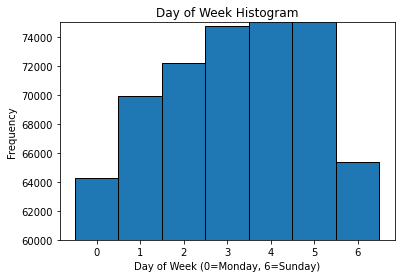

In [ ]:
# 요일별 히스토그램을 그려 주간 승차 분포확인

import numpy as np

df['day_of_week'].plot.hist(bins = np.arange(8)-0.5, ec = 'black', ylim = (60000, 75000))
plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
plt.title('Day of Week Histogram')
plt.show()

In [ ]:
# 요일별로 승차가 다르다.
# 월요일부터 금요일까지 증가하다가 금요일에 정점을 찍는다. 주말에 급감한다.

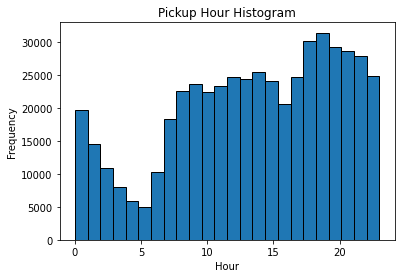

In [ ]:
# 시간별 집계

df['hour'].plot.hist(bins=24, ec='black')
plt.title('Pickup Hour Histogram')
plt.xlabel('Hour')
plt.show()

In [ ]:
# 아침출근시간보다 저녁 퇴근시간에 승차수가 더 많다
# 낮시간에는 분포가 일정하다.
# 오후 6시부터 증가하고 오후 7시에 정점. 오후 11시부터 급감

In [ ]:
# 데이터 전처리

# 결측값 및 이상치 처리

# 결측값 확인
print(df.isnull().any())

key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude     True
dropoff_latitude      True
passenger_count      False
year                 False
month                False
day                  False
day_of_week          False
hour                 False
dtype: bool


In [ ]:
# 결측값이 하차의 위도경도에 있다 몇개가 있는지 확인한다.

print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64


In [ ]:
# 전체 50만 로우중에 결측값을 가진 로우는 다섯개다. 그냥 제거해도 문제 없다.

df = df.dropna()
print(df.isnull().sum())


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64


In [ ]:
# 이상치 확인

# 통계요약

print(df.describe())

         fare_amount  pickup_longitude  ...    day_of_week           hour
count  499995.000000     499995.000000  ...  499995.000000  499995.000000
mean       11.358182        -72.520091  ...       3.042020      13.510843
std         9.916069         11.856446  ...       1.949243       6.511596
min       -44.900000      -2986.242495  ...       0.000000       0.000000
25%         6.000000        -73.992047  ...       1.000000       9.000000
50%         8.500000        -73.981785  ...       3.000000      14.000000
75%        12.500000        -73.967117  ...       5.000000      19.000000
max       500.000000       2140.601160  ...       6.000000      23.000000

[8 rows x 11 columns]


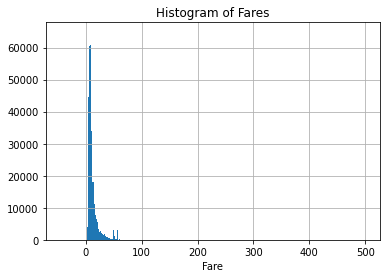

In [ ]:
# 요금쪽이 이상하다. -44인것도 있고 500달러 정도의 요금도 있다. 히스토그램 그려서 확인한다.

df['fare_amount'].hist(bins=500)
plt.xlabel('Fare')
plt.title("Histogram of Fares")
plt.show()

In [ ]:
# 이상치가 많지 않으므로 제거해도 문제 없다.
# 50달러 부근의 튀어나온것은 택시요금 정액제 때문에 그럴수도있다.

# 0달러보다 작거나 100달러보다 큰요금을 가진 로우를 제거한다

df = df[(df['fare_amount'] >= 0) & (df['fare_amount'] <= 100)]

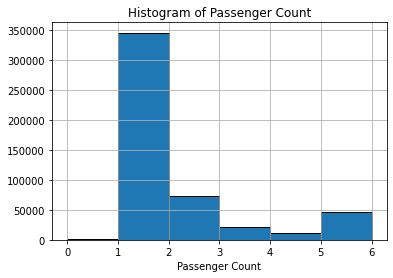

In [ ]:
# passenger_count 칼럼에도 이상치가있다. 히스토그램 확인

df['passenger_count'].hist(bins=6, ec='black')
plt.xlabel("Passenger Count")
plt.title("Histogram of Passenger Count")
plt.show()

In [ ]:
# 수가 적긴하지만 탑승객이 0인 자료가 있다.
# 이 로우를 버리기보다는 최빈값 (1)로 대체한다.

df.loc[df['passenger_count'] == 0, 'passenger_count'] = 1

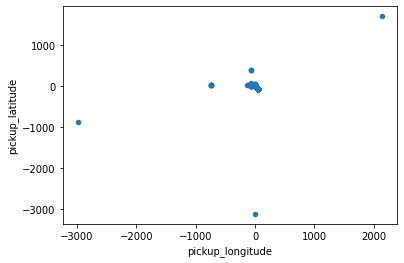

In [ ]:
# 승차 위치에 이상치가 있는지 확인한다.

df.plot.scatter('pickup_longitude', 'pickup_latitude')
plt.show()

In [ ]:
# 점차트 가장자치에 있는 점들은 모두 이상치다. 매우 큰 위도 경도값을 가지는 값들을 제거한다.
# 승차위치만을 확인했지만 하차위치도 같이 제거해준다.

for long in ['pickup_longitude', 'dropoff_longitude']:
  df = df[(df[long] > nyc_min_longitude) & (df[long] < nyc_max_longitude)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
  df = df[(df[lat] > nyc_min_latitude) & (df[lat] < nyc_max_latitude)]

In [ ]:
# 특징 공학
# 문제의 도메인 지식을 활용해 새로운 특징 변수를 만드는 과정
# 이 문제에서는 승차 날짜와 시각, 승차 위치 변수를 바탕으로 새로운 특징 변수를 만든다.

In [ ]:
# 데이터 시각화에서 봤듯이 승차 수는 요일과 시간에 따라 크게 다르다.

print(df.head()['pickup_datetime'])

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]


In [ ]:
# pickup_datetime 칼럼을 연 월 일 등으로 나눈다.

df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

In [ ]:
# 새로운 칼럼 확인

print(df.loc[:5, ['pickup_datetime', 'year', 'month', 'day', 'day_of_week', 'hour']])

            pickup_datetime  year  month  day  day_of_week  hour
0 2009-06-15 17:26:21+00:00  2009      6   15            0    17
1 2010-01-05 16:52:16+00:00  2010      1    5            1    16
2 2011-08-18 00:35:00+00:00  2011      8   18            3     0
3 2012-04-21 04:30:42+00:00  2012      4   21            5     4
4 2010-03-09 07:51:00+00:00  2010      3    9            1     7
5 2011-01-06 09:50:45+00:00  2011      1    6            3     9


In [ ]:
# 잘 나눠졌으므로 안쓰는 pickup_datetime은 삭제한다

df = df.drop(['pickup_datetime'], axis=1)

In [ ]:
# 위치 특징 변수

# 승차 및 하차 위치 정보는 있지만 운행거리 정보가 없다.
# 승차 및 하차 위치 정보를 이용해 거리를 계산하고 새로운 특징 변수로 추가한다.
# 운행거리는 유클리드 거리로 계산한다. 두점 사이의 직선거리

def euc_distance(lat1, long1, lat2, long2):
  return(((lat1 - lat2)**2 + (long1 - long2)**2)**0.5)

In [ ]:
# 이 함수를 DataFrame에 적용해 distance 칼럼을 추가한다.

df['distance'] = euc_distance(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

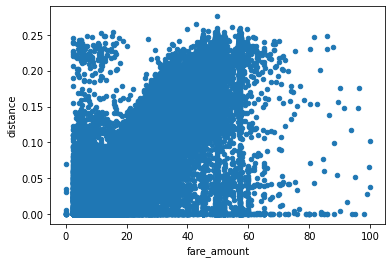

In [ ]:
# 운행거리는 요금과 밀접한 관련이 있을것이므로 두 변수의 점차트를 그려본다

df.plot.scatter('fare_amount', 'distance')
plt.show()

In [ ]:
# 가설이 어느정도 맞으나 운행거리와 상관없이 요금이 나온 경우도 있다.
# 가운데쯤 수직선이 세개정도 있으며 이건 아까 말했던 정액제와 관련이 있을 수 있다.
# 정액제는 공항을 오가는 택시의 금액이 52달러 정도로 고정된것을 말한다.
# 뉴욕시 주요 공항과 승하차 위치의 거리를 새로운 특징변수로 추가할 필요가 있다.
# 그렇게하면 신경망은 공항택시의 정액제에 대해서 학습할 수 있다.

In [ ]:
# 공항과 승하차 사이의 거리계산

airports = {'JFK_Airport': (-73.78, 40.643), 'Laguardia_Airport': (-73.87, 40.77), 'Network_Airport' : (-74.18, 40.69)}

for airport in airports:
  df['pickup_dist_' + airport] = euc_distance(df['pickup_latitude'], df['pickup_longitude'], airports[airport][1], airports[airport][0])
  df['dropoff_dist_' + airport] = euc_distance(df['dropoff_latitude'], df['dropoff_longitude'], airports[airport][1], airports[airport][0])


In [ ]:
# 맨 앞 로우 출력해 거리함수 동작확인

print(df[['key', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_dist_JFK_Airport', 'dropoff_dist_JFK_Airport']].head())

                             key  ...  dropoff_dist_JFK_Airport
0    2009-06-15 17:26:21.0000001  ...                  0.092710
1    2010-01-05 16:52:16.0000002  ...                  0.242961
2   2011-08-18 00:35:00.00000049  ...                  0.237050
3    2012-04-21 04:30:42.0000001  ...                  0.240846
4  2010-03-09 07:51:00.000000135  ...                  0.225878

[5 rows x 7 columns]


In [ ]:
# 변수 스케일링

# 변수 범위가 모두 다르기 때문에 스케일링한다. 스케일링시 원본함수를 남겨놓는것이 좋다.

df_prescaled = df.copy()

# 목표 변수인 금액은 변환하지 않아도 되므로 스케일링 적용전에 제거한다.
df_scaled = df.drop(['fare_amount'], axis=1)

# 책에는 없는데 key 칼럼도 제거했다.
df_scaled = df.drop(['key'], axis=1)

In [ ]:
from sklearn.preprocessing import scale

df_scaled = scale(df_scaled)

In [ ]:
# scale로 반환된 객체를 판다스 DataFrame으로 변환하고 원본의 요금칼럼을 붙여서 작업을 마무리한다.

cols = df.columns.tolist()
cols.remove('fare_amount')
cols.remove('key')

# 원본 df에 키값을 삭제 안해서 책과 다르게 index에 df_scaled.index 사용
df_scaled = pd.DataFrame(df_scaled, columns=cols, index=df_scaled.index)
df_scaled = pd.concat([df_scaled, df['fare_amount']], axis = 1)
df = df_scaled.copy()

In [ ]:
print(df.describe())

       pickup_longitude  ...    fare_amount
count      4.834380e+05  ...  483438.000000
mean      -4.260119e-13  ...      11.014298
std        1.000001e+00  ...       8.771064
min       -2.194519e+00  ...       0.000000
25%       -4.943039e-01  ...       6.000000
50%       -1.912107e-01  ...       8.500000
75%        2.146328e-01  ...      12.500000
max        6.719190e+00  ...     100.000000

[8 rows x 18 columns]


In [ ]:
# 신경망 만들기

# 모델 아키텍쳐
# 은닉 레이어 4개 사용. 첫번째는 128노드 다음 레이어부터 노드개수 절반씩 줄임
# 은닉 레이어의 활성화 함수는 ReLU
# 회귀 모델이므로 출력레이어의 노드는 하나다

# 회귀 손실 함수
# 택시 요금이라는 목표변수는 연속변수이다. 2장에서 이진변수(1 또는 0)으로 예측한것과 다르다

# 회귀는 연속변수(비용,시간,높이) 등을 예측하며 분류 모델은 클래스(사람인지 고양이인지)를 예측한다.
# 회귀에서는 RMSE 계산 공식을 사용한다
# ((예측값 - 실제값)**5)**0.5
# 오차를 제곱하는 이유는 실제값보다 예측값이 큰 경우와 작은 경우 동일한 페널티를 부과하기 위해서이다.
# 제곱근을 적용한것은 실제값과 오차를 유사한 스케일로 만들기 위해서이다.

In [ ]:
# DataFrame을 특징변수와 목표변수로 나눈다

X = df.loc[:, df.columns != 'fare_amount']
y = df.loc[:, 'fare_amount']

In [ ]:
# 훈련데이터셋과 테스트 데이터셋으로 나눈다

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# 케라스 Sequential 모델을 만든다

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))

# 회귀모델의 출력레이어에는 활성화함수를 적용하지 않는다. 출력값을 왜곡하고 모델 성능에 악영향을 줄 수 있기 때문이다.
model.add(Dense(1))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2304      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 12,913
Trainable params: 12,913
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 컴파일하고 훈련한다

# 손실함수로는 mse를 사용 (RMSE를 적용하기 위함)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(X_train, y_train, batch_size=1, epochs=1)

386750/386750 [==============================] - 469s 1ms/step - loss: 13.8342 - mse: 13.8342


In [ ]:
# 무작위로 샘플을 뽑아 예측하는 함수 작성

def predict_random(df_prescaled, X_test, model):
  # X_test에서 샘플 뽑기
  sample = X_test.sample(n=1, random_state=np.random.randint(low=0, high=10000))
  # 뽑힌 샘플의 인덱스값 (0번째는 인덱스값이고 1번째는 타입이다. 인덱스만 필요하므로 [0]을 붙임)
  idx = sample.index[0]
  # 뽑힌 샘플의 실제 금액
  actual_fare = df_prescaled.loc[idx, 'fare_amount']
  
  # 날짜이름
  day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

  # 뽑힌 샘플의 실제 날짜이름을 가져온다
  day_of_week = day_names[df_prescaled.loc[idx, 'day_of_week']]

  # 뽑힌 샘플의 실제시간
  hour = df_prescaled.loc[idx,'hour']

  # 뽑힌 샘플의 예측시간 (확인해보니 결과는 (1,1)행렬이 나왔다. 노드가 1개라서 그런듯. 따라서 값을 가져오려면 [0][0]을 해야됨)
  predicted_fare = model.predict(sample)[0][0]

  # 실제 금액과 예측금액의 차이를 계산
  rmse = np.sqrt(np.square(predicted_fare - actual_fare))
  print("Trip Details: {},{}:00hrs".format(day_of_week, hour))
  print("Actual fare: ${:0.2f}".format(actual_fare))
  print("Pridicted fare: ${:0.2f}".format(predicted_fare))
  print("RMSE: ${:0.2f}".format(rmse))

In [ ]:
predict_random(df_prescaled, X_test, model)

Trip Details: Thursday,19:00hrs
Actual fare: $6.70
Pridicted fare: $5.76
RMSE: $0.94


In [ ]:
# 정액제 요금 예측 테스트
# 매우 큰차이를 보이는거도 있고 거의 맞게 예측하는것도 있다.
# 50만 데이터로 해서 그럴수도있음. 정액요금 예측에 대해서는 더 정밀하게 해야될듯.

print(y_test[y_test == 52]) # 5023

sample = X_test[X_test.index == 437304]
actual_fare = df_prescaled.loc[sample.index[0], 'fare_amount']
predicted_fare = model.predict(sample)[0][0]

print("Actual fare: ${:0.2f}".format(actual_fare))
print("Pridicted fare: ${:0.2f}".format(predicted_fare))



492943    52.0
190017    52.0
65658     52.0
448825    52.0
99649     52.0
          ... 
385273    52.0
5023      52.0
437304    52.0
402805    52.0
367376    52.0
Name: fare_amount, Length: 172, dtype: float64
Actual fare: $52.00
Pridicted fare: $45.91


In [ ]:
# 전체 데이터의 RMSE 계산

from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print("Train RMSE:{:0.2f}".format(train_rmse))
print("Test RMSE:{:0.2f}".format(test_rmse))


Train RMSE:3.51
Test RMSE:3.61


In [ ]:
# 이 모델은 평균 3달러정도의 오차를 보인다.